# Florance Airbnb Analysis

In this notebook we will try to analyse Florance Airbnb listing, we will follow CRISP-DM process


## Table of Contents

I. [Business understanding](#Business-understanding)<br> 
II. [Data understanding](#Data-understanding)<br>
III. [Data preparation](#Data-preparation)<br>
IV. [Data modeling](#Data-modeling)<br>
V. [Results evaluation](#Results-evaluation)<br>

## <a class="anchor" id="Business-understanding">Business understanding</a>

We will try to answer the following business quesions
1. What are the sub ratings that highly correlate to total rating?
2. What are the neighborhoods the highest average prices?
3. What is the time of the year has the highest rental prices?


## <a class="anchor" id="Data-understanding">Data understanding</a>

### Load necessary libraries

In [48]:
import pandas as pd
import seaborn as sns
from matplotlib import cm, pyplot as plt
import numpy as np 
%matplotlib inline

### Load the data

In [49]:
calendar = pd.read_csv("calendar.csv")
listings = pd.read_csv("listings.csv")
reviews = pd.read_csv("reviews.csv")

/home/mohammad/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (43,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Explore the data

In [50]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,285563,2019-06-22,f,$130.00,$130.00,1,90
1,24469,2019-06-22,t,$80.00,$80.00,2,365
2,24469,2019-06-23,t,$80.00,$80.00,2,365
3,24469,2019-06-24,t,$80.00,$80.00,2,365
4,24469,2019-06-25,t,$80.00,$80.00,2,365


In [51]:
calendar.describe()

,listing_id,minimum_nights,maximum_nights
count,4.388030e+06,4.388030e+06,4.388030e+06
mean,1.799306e+07,3.074671e+00,6.293674e+02
std,1.085933e+07,1.805407e+01,6.680690e+03
min,2.446900e+04,1.000000e+00,1.000000e+00
25%,7.794091e+06,1.000000e+00,3.000000e+01
50%,1.868842e+07,2.000000e+00,3.650000e+02
75%,2.702829e+07,3.000000e+00,1.125000e+03
max,3.594108e+07,1.120000e+03,7.300000e+05


In [52]:
pd.set_option('display.max_columns', None)
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,24469,https://www.airbnb.com/rooms/24469,20190622031149,2019-06-22,Fortezza/City Centre Modern Apt 2+2,"Apartment, perfect for 2 people, wide, bright ...",Located on the first floor of a 19th century t...,"Apartment, perfect for 2 people, wide, bright ...",none,In 10/15 minutes walking or with only one stop...,NaN,"We do not have private parking, but we are off...",NaN,Benedetta and Lorenzo will be happy to welcome...,"I nostri ospiti sono i benvenuti, chiediamo di...",NaN,NaN,https://a0.muscache.com/im/pictures/fd822ef3-4...,NaN,99178,https://www.airbnb.com/users/show/99178,Benedetta And Lorenzo,2010-03-26,"Florence, Toscana, Italy","Hi, my name is Benedetta and together with my ...",within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/99178/profile...,https://a0.muscache.com/im/users/99178/profile...,San Jacopino,5.0,5.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Florence, Tuscany, Italy",Centro Storico,Centro Storico,NaN,Florence,Tuscany,50144,Florence,"Florence, Italy",IT,Italy,43.78308,11.24418,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,H...",NaN,$80.00,$500.00,$950.00,$0.00,$20.00,2,$15.00,2,365,2,2,365,365,2.0,365.0,2 weeks ago,t,21,47,70,345,2019-06-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,"{Florence,"" IT Zip Codes"","" Florence"","" IT""}",t,f,moderate_new,f,f,5,5,0,0,NaN
1,24470,https://www.airbnb.com/rooms/24470,20190622031149,2019-06-22,Fortezza/City Centre Modern Apt 2+1,"Apartment, perfect for 2 people, can accommoda...",Located on the first floor of a 19th century t...,"Apartment, perfect for 2 people, can accommoda...",none,In 10/15 minutes walking you will reach the hi...,Da pochi mesi è attiva la nuova LINEA 2 della ...,"We do not have private parking, but we are off...",NaN,Benedetta and Lorenzo will be happy to welcome...,RULES AND CONDITION(URL HIDDEN) 1. The apartme...,NaN,NaN,https://a0.muscache.com/im/pictures/cfa220db-5...,NaN,99178,https://www.airbnb.com/users/show/99178,Benedetta And Lorenzo,2010-03-26,"Florence, Toscana, Italy","Hi, my name is Benedetta and together with my ...",within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/99178/profile...,https://a0.muscache.com/im/users/99178/profile...,

In [53]:
listings.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.202200e+04,1.202200e+04,0.0,0.0,0.0,1.202200e+04,0.0,11998.000000,11998.000000,0.0,12022.000000,12022.000000,12022.000000,12015.000000,12012.000000,11999.000000,379.000000,12022.000000,12022.000000,12022.000000,12022.000000,12022.000000,12022.000000,12022.000000,12022.000000,12022.000000,12022.000000,12022.000000,12022.000000,12022.000000,12022.000000,12022.000000,10272.000000,10270.000000,10271.000000,10267.000000,10267.000000,10266.000000,10265.000000,12022.000000,12022.00000,12022.000000,12022.000000,10349.000000
mean,1.799306e+07,2.019062e+13,NaN,NaN,NaN,6.589200e+07,NaN,30.347558,30.347558,NaN,43.773871,11.253617,3.832391,1.310612,1.463287,2.344529,348.060686,1.803111,2.977791,639.106139,2.749376,3.516553,624.284894,633.028448,3.073598,629.364989,10.466395,26.091915,43.350108,200.680087,48.030611,15.893445,93.702005,9.658033,9.577062,9.739359,9.735561,9.650399,9.410813,14.003161,13.04001,0.943354,0.019797,2.049765
std,1.085978e+07,0.000000e+00,NaN,NaN,NaN,7.523406e+07,NaN,122.926828,122.926828,NaN,0.009772,0.016564,2.000567,0.683907,0.898514,1.670910,470.046597,1.254920,18.527526,6681.152453,16.808645,19.038528,6680.997749,6680.958820,17.688385,6680.879551,9.438975,19.271003,28.850653,122.536516,74.106464,21.555396,7.201178,0.705488,0.766176,0.636457,0.667716,0.638914,0.798759,33.441818,33.56617,2.630575,0.278935,1.956661
min,2.446900e+04,2.019062e+13,NaN,NaN,NaN,1.565100e+04,NaN,0.000000,0.000000,NaN,43.726130,11.159010,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.00000,0.000000,0.000000,0.010000
25%,7.795951e+06,2.019062e+13,NaN,NaN,NaN,7.147408e+06,NaN,1.000000,1.000000,NaN,43.768540,11.245380,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,30.000000,1.000000,2.000000,29.000000,30.000000,1.100000,30.000000,2.000000,9.000000,19.000000,86.000000,2.000000,1.000000,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,1.00000,0.000000,0.000000,0.470000
50%,1.868842e+07,2.019062e+13,NaN,NaN,NaN,3.077204e+07,NaN,3.000000,3.000000,NaN,43.772285,11.254120,4.000000,1.000000,1.000000,2.000000,161.000000,1.000000,2.000000,365.000000,2.000000,2.000000,365.000000,365.000000,2.000000,365.000000,8.000000,25.000000,45.000000,226.500000,15.000000,6.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000,1.00000,0.000000,0.000000,1.440000
75%,2.702809e+07,2.019062e+13,NaN,NaN,NaN,1.083819e+08,NaN,10.000000,10.000000,NaN,43.778060,11.261977,5.000000,1.500000,2.000000,3.000000,592.000000,2.000000,3.000000,1125.000000,2.000000,3.000000,1125.000000,1125.000000,3.000000,1125.000000,18.000000,43.000000,68.000000,314.000000,62.000000,24.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.000000,6.00000,1.000000,0.000000,3.110000
max,3.594108e+07,2.019062e+13,NaN,NaN,NaN,2.702475e+08,NaN,1459.000000,1459.000000,NaN,43.831740,11.331010,16.000000,12.000000,13.000000,23.000000,3550.000000,16.000000,

In [54]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,24470,102982,2010-09-22,77244,Luciana,We loved to stay at Benedetta and Lorenzo apt....
1,24470,124303,2010-10-22,233800,Steve,A perfect place to spend a week. Amenities wer...
2,24470,440911489,2019-04-21,150908154,Paola,Buona posizione tranquilla e ottima accoglienz...
3,24472,340528,2011-06-28,239905,Michael,Lovely place. Its closeness to the train stati...
4,24472,1107562,2012-04-11,1207241,Daniel,Loved this place! Benedetta and Lorenzo were g...


In [55]:
reviews.describe()

,listing_id,id,reviewer_id
count,5.774240e+05,5.774240e+05,5.774240e+05
mean,1.034263e+07,2.150494e+08,7.061995e+07
std,8.402391e+06,1.361453e+08,6.398917e+07
min,2.447000e+04,4.177600e+04,5.000000e+01
25%,2.957378e+06,9.696546e+07,1.951170e+07
50%,8.204055e+06,2.004366e+08,4.879260e+07
75%,1.663050e+07,3.208055e+08,1.101568e+08
max,3.582893e+07,4.733603e+08,2.697571e+08


## <a class="anchor" id="Data-preparation">Data preparation</a>

We will drop rows with any NaN value from tje ratings because we are trying to analyse the relationship between the total rating to sub ratings dropping NaNs won't hurt our analysis

In [56]:
ratings = listings[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]
ratings_without_NaNs = ratings.dropna()

In [57]:
def clean_price(price):
    '''
    Clean the price column by removing ($,',')
    
    Parameters:
    price (pandas.Series): price series that contain ($,',')
    
    Returns:
    pandas.Series: cleaned price series
    '''
    return price.str.replace('([$,])', '').astype(float)

In [58]:
# Clean the price from listing data by removing $ and ','
listings['price'] = clean_price(listings['price'])

In [59]:
# Clean the price from calendar data by removing $ and ','
calendar['price'], calendar['adjusted_price'] = clean_price(calendar['price']), clean_price(calendar['adjusted_price'])
calendar['date'] = pd.to_datetime(calendar['date'])

## <a class="anchor" id="Data-modeling">Data modeling</a>

We will try to answer the business quesions we asked above 

### Question I: What are the sub ratings that highly correlate to total rating?

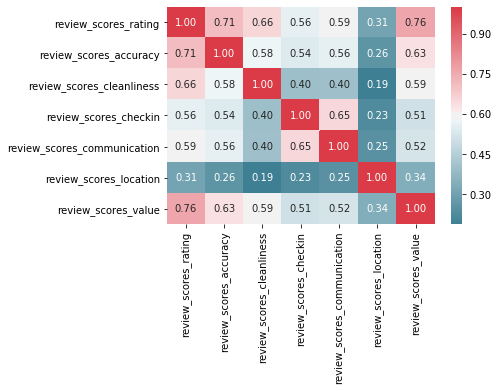

In [60]:
# Calculate the correlation factor the ratings
ratings_corr = ratings_without_NaNs.corr()

colormap = sns.diverging_palette(220, 10, as_cmap=True)

#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(ratings_corr, cmap=colormap, annot=True, fmt=".2f")
plt.show()

### Question II: What are the neighborhoods the highest average prices?

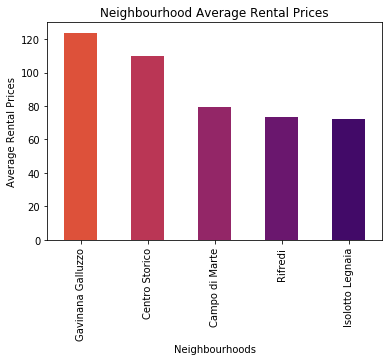

In [61]:
# Calculate the average price by neighbourhood
neighbourhood_cleansed_avg_price = listings.groupby('neighbourhood_cleansed').mean()['price'].sort_values(ascending=False)

# Visualize the result
color = cm.inferno_r(np.linspace(.4,.8, 5))
ax = neighbourhood_cleansed_avg_price.plot(kind='bar', title="Neighbourhood Average Rental Prices", stacked=True, color=color, legend=False);
ax.set_xlabel("Neighbourhoods");
ax.set_ylabel("Average Rental Prices");

### Question III: What is the time of the year has the highest rental prices?


In [62]:
calendar_by_month = calendar.drop(['available', 'minimum_nights', 'maximum_nights'], axis=1).groupby(calendar['date'].dt.strftime('%Y-%m'))

In [63]:
# Calculate the percentage of the increase in listing prices
diff = calendar_by_month.apply(lambda group: 100 * (group['adjusted_price'] - group['price']) / group['price'])

In [64]:
# Calculate the mean of percentage of the increase in listing prices
total_diff = diff.mean(level=0)

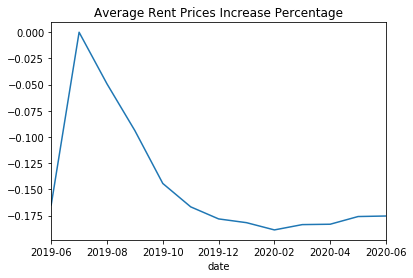

In [65]:
# Visualize the result
total_diff.plot(title="Average Rent Prices Increase Percentage")
plt.show()

## <a class="anchor" id="Results-evaluation">Results evaluation</a>

a small summary of findings

1. **What are the sub ratings that highly correlate to total rating?** the most sub rating that highly correlates to the total rating is the value and least is the location
2. **What are the neighborhoods the highest average prices?** the neighborhoods with the highest average prices is Gavinana Galluzzo and the neighborhood with the least is Isolotto Legnaia
3. **What is the time of the year has the highest rental prices?** the time of the year has the highest rental prices in the summertime
